In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
import re
import datetime
import time

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
# Request 1
# 월별 배달 건수 많은 지역구 순위 (수도권)
deliv_data = pd.read_csv('data/dlvr_call.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [67]:
deliv_data['PROCESS_DT']=pd.to_datetime(deliv_data['PROCESS_DT'])
deliv_data['year'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).year
deliv_data['month'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).month
deliv_data['SETLE_CARD_NM'].fillna('',inplace=True)

deliv_data.drop(['DLVR_REQUST_ENTRPS_ID','DLVR_RCEPT_ENTRPS_ID','DLVR_STORE_ID'],axis=1,inplace=True)
deliv_data.drop(['DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_LI_NM','DLVR_STORE_ADSTRD_CODE','DLVR_STORE_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_DSTN_LEGALDONG_CODE','DLVR_DSTN_LI_NM','DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_MAN_ID'],axis=1,inplace=True)

deliv_data.head(4)

KeyError: "['DLVR_REQUST_ENTRPS_ID' 'DLVR_RCEPT_ENTRPS_ID' 'DLVR_STORE_ID'] not found in axis"

In [42]:
#plt.plot(range(len(deliv_data['DLVR_STORE_INDUTY_NM'])),deliv_data['DLVR_STORE_INDUTY_NM'])
deliv_data['DLVR_STORE_INDUTY_NM'].value_counts()

치킨        962851
한식        537266
분식        494233
족발/보쌈     367846
카페/디저트    345708
패스트푸드     309206
돈까스/일식    226834
피자        224504
야식        190211
찜탕        166300
중식        133655
아시안/양식    104130
회          96165
배달전문업체     83810
도시락        45869
심부름         7683
Name: DLVR_STORE_INDUTY_NM, dtype: int64

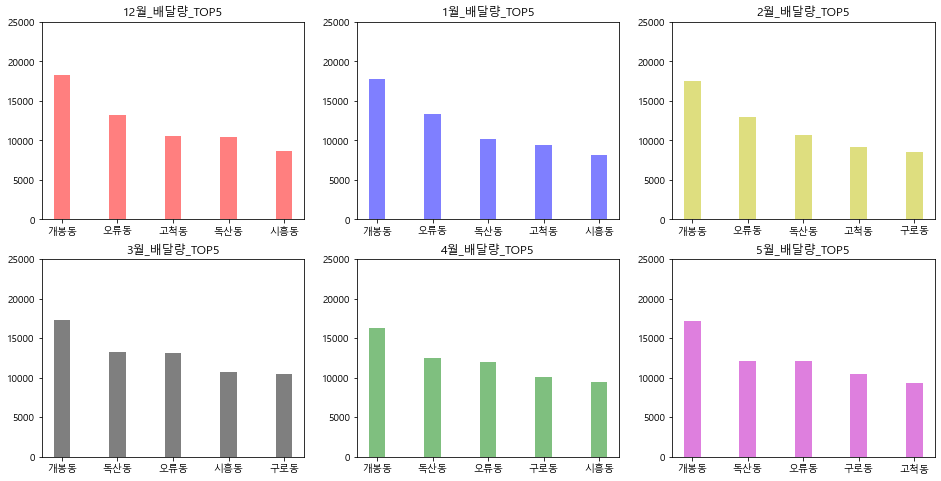

In [32]:

count_by_month = []
count_by_month_df = pd.DataFrame({})
target_df =deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_DSTN_BRTC_NM'] == '서울특별시')]

for i in [12,1,2,3,4,5]:
    count_by_month_sample=target_df[target_df['month']==i].groupby('DLVR_DSTN_LEGALDONG_NM')['DLVR_REQUST_STTUS_VALUE'].count()
    data=count_by_month_sample.sort_values(ascending=False).head(5)
    count_by_month.append(data)
    
    data_df=pd.DataFrame(data)
    count_by_month_df = count_by_month_df.append(data_df)
    
colors=['r','b','y','k','g','m']
plt.figure(figsize=(16,8))
index=0
for i in [12,1,2,3,4,5]:
    plt.subplot(2,3,index+1)
    plt.bar(count_by_month[index].index,count_by_month[index].values,width=0.3,color=colors[index],alpha=0.5,)
    plt.ylim(0,25000)
    plt.title('{}월_배달량_TOP5'.format(i))
    index=index+1

#plt.savefig('C:/myPyCode/figures/count_by_month')
plt.show()

#count_by_month_df.to_csv('C:/myPyCode/figures/count_by_month_df.csv',encoding='cp949')


In [46]:
# 지역별 성별 분포(top6 지역의 성별 정보)
# 지역별 연령 분포(top6 지역의 성별 정보)
# 20200214 21시 기준

popl_data=pd.read_csv('data/popl.csv')

In [47]:
# 개봉동 : 11530740,11530750,11530760
# 독산동 : 11545610,11545620,11545630,11545640
# 오류동 : 11530770,11530780
# 시흥동 : 11545670,11545680,11545690,11545700,11545710
# 구로동 : 11530520,11530530,11530540,11530550,11530560
# 고척동 : 11530720,11530730

male=[]
female=[]

gaebong = popl_data[(popl_data['adstrd_code'] >= 11530740) & (popl_data['adstrd_code'] <= 11530760)]
doksan = popl_data[(popl_data['adstrd_code'] >= 11545610) & (popl_data['adstrd_code'] <= 11545640)]
orue = popl_data[(popl_data['adstrd_code'] >= 11530770) & (popl_data['adstrd_code'] <= 11530780)]
siheung = popl_data[(popl_data['adstrd_code'] >= 11545670) & (popl_data['adstrd_code'] <= 11545710)]
guro = popl_data[(popl_data['adstrd_code'] >= 11530520) & (popl_data['adstrd_code'] <= 11530560)]
gocheok = popl_data[(popl_data['adstrd_code'] >= 11530720) & (popl_data['adstrd_code'] <= 11530730)]

gaebong['pop'] = gaebong['local_pop']  + gaebong['fore_pop_1'] + gaebong['fore_pop_2']
doksan['pop'] = doksan['local_pop']  + doksan['fore_pop_1'] + doksan['fore_pop_2']
orue['pop'] = orue['local_pop']  + orue['fore_pop_1'] + orue['fore_pop_2']
siheung['pop'] = siheung['local_pop']  + siheung['fore_pop_1'] + siheung['fore_pop_2']
guro['pop'] = guro['local_pop']  + guro['fore_pop_1'] + guro['fore_pop_2']
gocheok['pop'] = gocheok['local_pop']  + gocheok['fore_pop_1'] + gocheok['fore_pop_2']

gaebong_gender = gaebong.groupby(['sexdstn_se_code'])['pop'].mean()
gaebong_gender
male.append(gaebong_gender.values[1])
female.append(gaebong_gender.values[2])

doksan_gender = doksan.groupby(['sexdstn_se_code'])['pop'].mean()
doksan_gender
male.append(doksan_gender.values[1])
female.append(doksan_gender.values[2])

orue_gender = orue.groupby(['sexdstn_se_code'])['pop'].mean()
orue_gender
male.append(orue_gender.values[1])
female.append(orue_gender.values[2])

siheung_gender = siheung.groupby(['sexdstn_se_code'])['pop'].mean()
siheung_gender
male.append(siheung_gender.values[1])
female.append(siheung_gender.values[2])

guro_gender = guro.groupby(['sexdstn_se_code'])['pop'].mean()
guro_gender
male.append(guro_gender.values[1])
female.append(guro_gender.values[2])

gocheok_gender = gocheok.groupby(['sexdstn_se_code'])['pop'].mean()
male.append(gocheok_gender.values[1])
female.append(gocheok_gender.values[2])


<ipython-input-47-c214400fbf65>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaebong['pop'] = gaebong['local_pop']  + gaebong['fore_pop_1'] + gaebong['fore_pop_2']
<ipython-input-47-c214400fbf65>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doksan['pop'] = doksan['local_pop']  + doksan['fore_pop_1'] + doksan['fore_pop_2']
<ipython-input-47-c214400fbf65>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

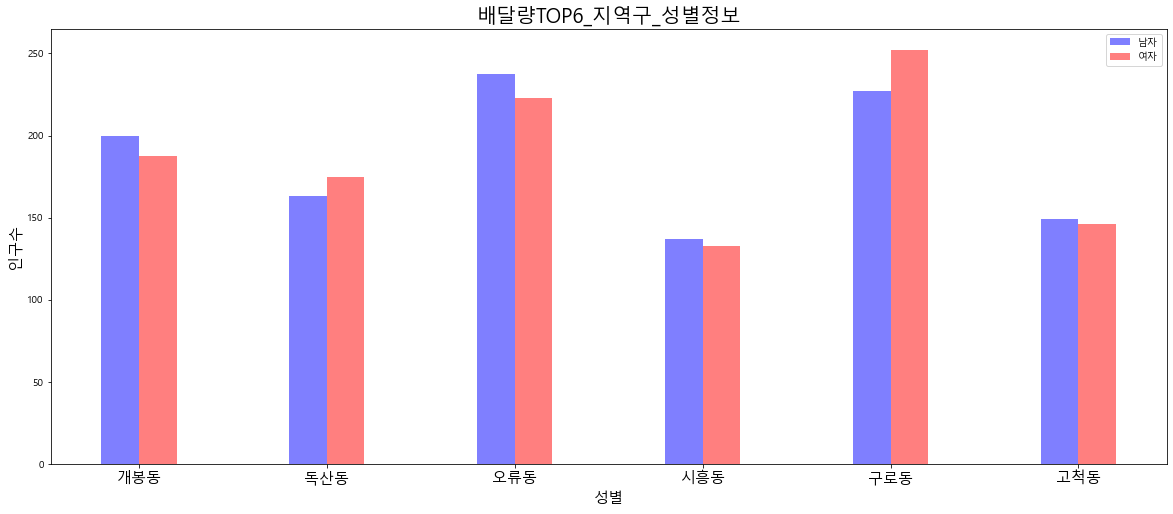

In [48]:

index = np.arange(6)
plt.figure(figsize=(20,8))
plt.bar(index,male,width=0.2,color='b',alpha=0.5,align='edge',label='male')
plt.bar(index+0.2,female,width=0.2,color='r',alpha=0.5,align='edge',label='female')
plt.xlabel('성별',size=15)
plt.ylabel('인구수',size=15)
plt.xticks(index+0.2,['개봉동','독산동','오류동','시흥동','구로동','고척동'],size=15)
plt.title('배달량TOP6_지역구_성별정보',size=20)
plt.legend(['남자','여자'])
plt.savefig('C:/myPyCode/figures/top6_gender.png')
plt.show()

top6_gender_df = pd.DataFrame({'male':male,'female':female})
top6_gender_df.index=['개봉동','독산동','오류동','시흥동','구로동','고척동']
top6_gender_df.to_csv("C:/myPyCode/figures/top6_gender_df.csv",encoding='cp949')


In [49]:
# 지역별 연령 분포(top5 지역의 성별 정보)

gaebong_age = gaebong.groupby(['agrde_se_code'])['pop'].mean()[1:]
doksan_age = doksan.groupby(['agrde_se_code'])['pop'].mean()[1:]
orue_age = orue.groupby(['agrde_se_code'])['pop'].mean()[1:]
siheung_age = siheung.groupby(['agrde_se_code'])['pop'].mean()[1:]
guro_age = guro.groupby(['agrde_se_code'])['pop'].mean()[1:]
gocheok_age = gocheok.groupby(['agrde_se_code'])['pop'].mean()[1:]

In [50]:

df1 = pd.DataFrame(gaebong_age).reset_index().rename(columns={'pop':'개봉동'})
df2 = pd.DataFrame(doksan_age).reset_index().rename(columns={'pop':'독산동'})
df3 = pd.DataFrame(orue_age).reset_index().rename(columns={'pop':'오류동'})
df4 = pd.DataFrame(siheung_age).reset_index().rename(columns={'pop':'시흥동'})
df5 = pd.DataFrame(guro_age).reset_index().rename(columns={'pop':'구로동'})
df6 = pd.DataFrame(gocheok_age).reset_index().rename(columns={'pop':'고척동'})

top6_age_df=df1
for i in [df2,df3,df4,df5,df6]:
    top6_age_df = pd.merge(top6_age_df,i,how='left',on='agrde_se_code')
top6_age_df.to_csv("C:/myPyCode/figures/top6_ager_df.csv",encoding='cp949')


In [12]:
top6_age_df

,agrde_se_code,개봉동,독산동,오류동,시흥동,구로동,고척동
0,age_10,78.411779,39.564227,97.992731,56.302724,52.676938,75.080559
1,age_15,116.494570,60.597423,128.923964,74.574492,79.431117,101.373411
2,age_20,194.028626,175.483287,223.330098,122.093041,237.401706,174.382821
3,age_25,248.230028,307.489804,345.261128,181.689800,453.424037,188.761276
4,age_30,235.781452,269.754722,313.289984,164.240662,411.014223,152.522386
5,age_35,245.897717,239.568289,315.573463,169.363227,374.264193,172.384156
6,age_40,224.902393,189.175000,299.581910,154.389061,314.306998,177.993265
7,age_45,244.613354,202.876912,293.460533,175.366495,324.564646,200.021850
8,age_50,238.404893,217.806232,270.530356,182.036906,290.932610,205.123664
9,age_55,259.801768,228.370909,278.913820,186.780997,281.875840,196.601626


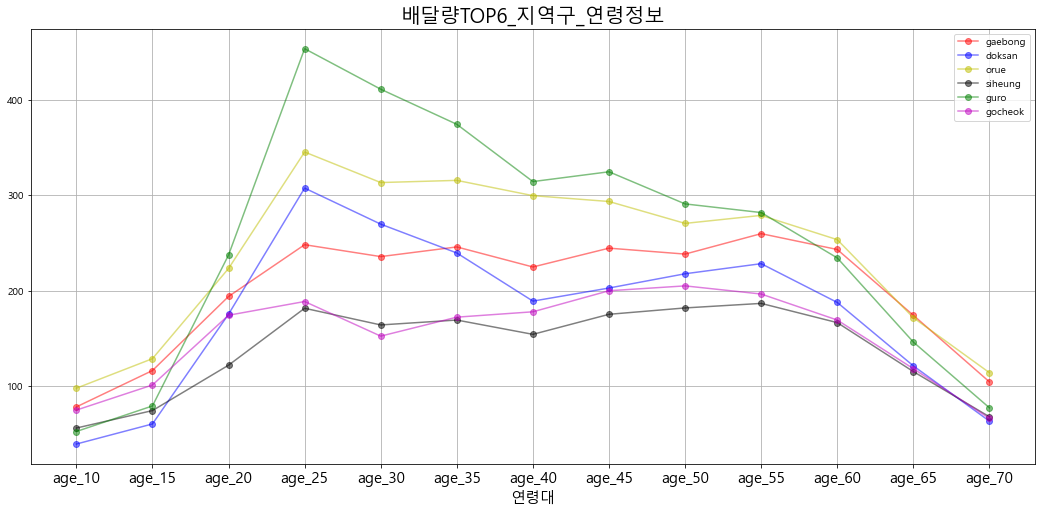

In [52]:
index=top6_age_df['agrde_se_code']
colors=['r','b','y','k','g','m']
plt.figure(figsize=(18,8))
plt.plot(range(13),gaebong_age.values,'-ro',label='gaebong',alpha=0.5)
plt.plot(range(13),doksan_age.values,'-bo',label='doksan',alpha=0.5)
plt.plot(range(13),orue_age.values,'-yo',label='orue',alpha=0.5)
plt.plot(range(13),siheung_age.values,'-ko',label='siheung',alpha=0.5)
plt.plot(range(13),guro_age.values,'-go',label='guro',alpha=0.5)
plt.plot(range(13),gocheok_age.values,'-mo',label='gocheok',alpha=0.5)
plt.grid(True)
plt.xlabel('연령대',size=15)
plt.xticks(range(13),index,size=15)
plt.title('배달량TOP6_지역구_연령정보',size=20)
plt.legend(['gaebong','doksan','orue','siheung','guro','gocheok'])

plt.savefig('C:/myPyCode/figures/top6_age.png')
plt.show()

In [20]:
# Request 2
# 수도권 주요 지역의 월별 배달 건수 및 전월대비 증감 (TOP6)

deliv_data = pd.read_csv('data/dlvr_call.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
deliv_data['PROCESS_DT']=pd.to_datetime(deliv_data['PROCESS_DT'])
deliv_data['year'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).year
deliv_data['month'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).month
deliv_data['SETLE_CARD_NM'].fillna('',inplace=True)

deliv_data.drop(['SN','DLVR_REQUST_ENTRPS_ID','DLVR_RCEPT_ENTRPS_ID','DLVR_STORE_ID','DLVR_MAN_ID'],axis=1,inplace=True)
deliv_data.drop(['DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_LI_NM','DLVR_STORE_ADSTRD_CODE','DLVR_STORE_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_DSTN_LEGALDONG_CODE','DLVR_DSTN_LI_NM','DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE'],axis=1,inplace=True)

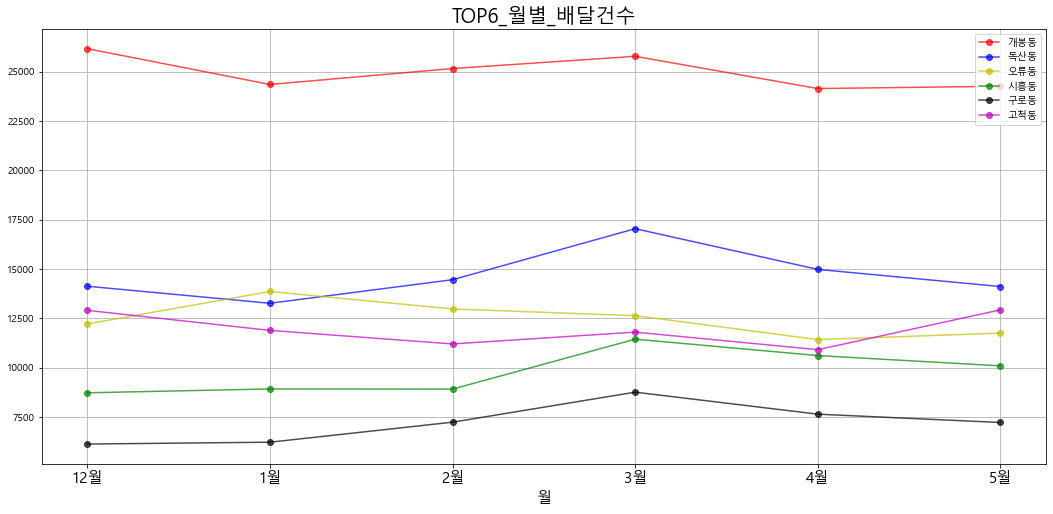

In [23]:

region_list=['개봉동','독산동','오류동','시흥동','구로동','고척동']
top6_deliv_data=deliv_data.loc[deliv_data['DLVR_STORE_LEGALDONG_NM'].isin(region_list)]
top6_deliv_data = top6_deliv_data[top6_deliv_data['DLVR_REQUST_STTUS_VALUE']==1]

top6_count_by_month = top6_deliv_data.groupby(['DLVR_STORE_LEGALDONG_NM','month'])['DLVR_REQUST_STTUS_VALUE'].count()
top6_count_by_month = pd.DataFrame(top6_count_by_month).reset_index()

colors=['r','b','y','g','k','m']

d1=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='개봉동'].reindex([5,0,1,2,3,4])['DLVR_REQUST_STTUS_VALUE'].values
d2=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='독산동'].reindex([23,18,19,20,21,22])['DLVR_REQUST_STTUS_VALUE'].values
d3=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='오류동'].reindex([35,30,31,32,33,34])['DLVR_REQUST_STTUS_VALUE'].values
d4=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='시흥동'].reindex([29,24,25,26,27,28])['DLVR_REQUST_STTUS_VALUE'].values
d5=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='구로동'].reindex([17,12,13,14,15,16])['DLVR_REQUST_STTUS_VALUE'].values
d6=top6_count_by_month[top6_count_by_month['DLVR_STORE_LEGALDONG_NM']=='고척동'].reindex([11,6,7,8,9,10])['DLVR_REQUST_STTUS_VALUE'].values

colors=['r','b','y','g','k','m']
sizes=15
plt.figure(figsize=(18,8))
plt.plot(range(6),d1,'-ro',alpha=0.7,label='개봉동')
plt.plot(range(6),d2,'-bo',alpha=0.7,label='독산동')
plt.plot(range(6),d3,'-yo',alpha=0.7,label='오류동')
plt.plot(range(6),d4,'-go',alpha=0.7,label='시흥동')
plt.plot(range(6),d5,'-ko',alpha=0.7,label='구로동')
plt.plot(range(6),d6,'-mo',alpha=0.7,label='고척동')
plt.xticks(range(6),['12월','1월','2월','3월','4월','5월'],size=sizes)
plt.title('TOP6_월별_배달건수',size=sizes+5)
plt.xlabel('월',size=sizes)
plt.grid(True)
plt.legend(loc='upper right')

plt.savefig('C:/myPyCode/figures/top6_count_by_month')
plt.show()

top6_count_by_month.to_csv('C:/myPyCode/figures/top6_count_by_month.csv',encoding='cp949')


In [24]:
# 수도권 주요 지역의 월별 배달 매출 및 전월대비 증감 (TOP6)
top6_deliv_data.head(4)

,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_AMOUNT,...,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month
9,2019-12-01,1,패스트푸드,서울특별시,구로구,오류동,서울특별시,구로구,궁동,3000,...,11500,2,,2019-12-01 20:22:17,2019-12-01 20:37:16,2019-12-01 20:44:49,2019-12-01 21:04:42,\N,2019,12
17,2019-12-01,1,패스트푸드,서울특별시,구로구,고척동,서울특별시,구로구,고척동,3000,...,13600,2,,2019-12-01 22:38:54,2019-12-01 22:40:24,2019-12-01 22:49:55,2019-12-01 22:55:59,\N,2019,12
18,2019-12-01,1,치킨,서울특별시,금천구,독산동,경기도,광명시,철산동,6300,...,23000,2,,2019-12-01 19:29:12,2019-12-01 19:44:58,2019-12-01 19:52:32,2019-12-01 20:17:08,\N,2019,12
19,2019-12-01,1,분식,서울특별시,구로구,고척동,서울특별시,구로구,구로동,3300,...,15000,2,,2019-12-01 18:52:02,2019-12-01 19:12:08,2019-12-01 19:22:07,2019-12-01 19:43:26,\N,2019,12


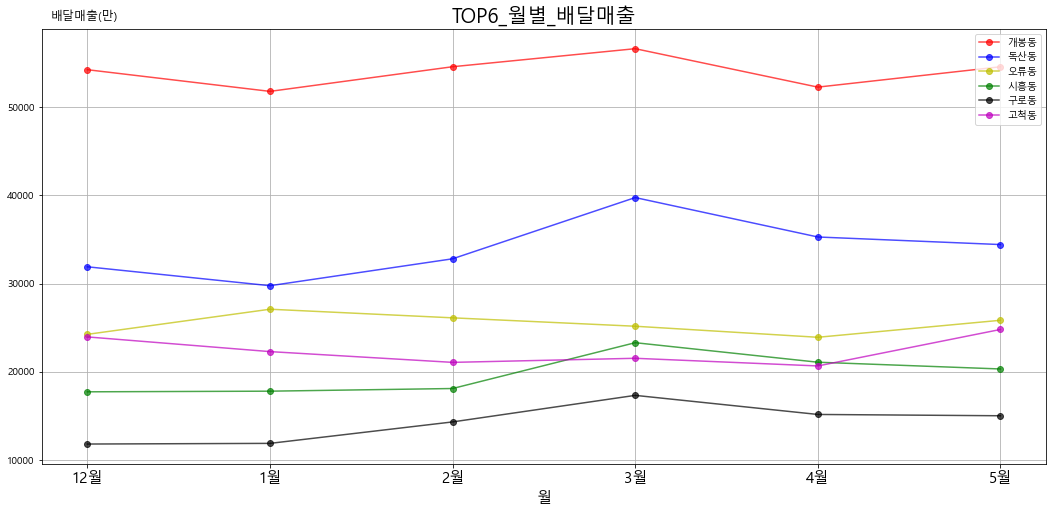

In [25]:

top6_sum_by_month = top6_deliv_data.groupby(['DLVR_STORE_LEGALDONG_NM','month'])['GOODS_AMOUNT'].sum()
top6_sum_by_month = pd.DataFrame(top6_sum_by_month).reset_index()
top6_sum_by_month['GOODS_AMOUNT'] = top6_sum_by_month['GOODS_AMOUNT']/10000

d1=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='개봉동'].reindex([5,0,1,2,3,4])['GOODS_AMOUNT'].values
d2=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='독산동'].reindex([23,18,19,20,21,22])['GOODS_AMOUNT'].values
d3=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='오류동'].reindex([35,30,31,32,33,34])['GOODS_AMOUNT'].values
d4=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='시흥동'].reindex([29,24,25,26,27,28])['GOODS_AMOUNT'].values
d5=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='구로동'].reindex([17,12,13,14,15,16])['GOODS_AMOUNT'].values
d6=top6_sum_by_month[top6_sum_by_month['DLVR_STORE_LEGALDONG_NM']=='고척동'].reindex([11,6,7,8,9,10])['GOODS_AMOUNT'].values

colors=['r','b','y','g','k','m']
sizes=15
plt.figure(figsize=(18,8))
plt.plot(range(6),d1,'-ro',alpha=0.7,label='개봉동')
plt.plot(range(6),d2,'-bo',alpha=0.7,label='독산동')
plt.plot(range(6),d3,'-yo',alpha=0.7,label='오류동')
plt.plot(range(6),d4,'-go',alpha=0.7,label='시흥동')
plt.plot(range(6),d5,'-ko',alpha=0.7,label='구로동')
plt.plot(range(6),d6,'-mo',alpha=0.7,label='고척동')
plt.xticks(range(6),['12월','1월','2월','3월','4월','5월'],size=sizes)
plt.title('TOP6_월별_배달매출',size=sizes+5)
plt.xlabel('월',size=sizes)
plt.text(-0.2,60000,'배달매출(만)',size=sizes-3)
plt.grid(True)
plt.legend(loc='upper right')

plt.savefig('C:/myPyCode/figures/top6_sum_by_month')
plt.show()

top6_sum_by_month.to_csv('C:/myPyCode/figures/top6_sum_by_month.csv',encoding='cp949')

In [7]:
# Request3
# 배달 업종별 카테고리화
deliv_data = pd.read_csv('data/dlvr_call.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:

deliv_data['PROCESS_DT']=pd.to_datetime(deliv_data['PROCESS_DT'])
deliv_data['year'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).year
deliv_data['month'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).month
deliv_data['SETLE_CARD_NM'].fillna('',inplace=True)

deliv_data.drop(['DLVR_REQUST_ENTRPS_ID','DLVR_RCEPT_ENTRPS_ID','DLVR_STORE_ID','DLVR_MAN_ID'],axis=1,inplace=True)
deliv_data.drop(['DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_LI_NM','DLVR_STORE_ADSTRD_CODE','DLVR_STORE_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_DSTN_LEGALDONG_CODE','DLVR_DSTN_LI_NM','DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE'],axis=1,inplace=True)


In [5]:

target_list=['개봉동','독산동','오류동','시흥동','구로동','고척동']

카페_디저트 = ['카페/디저트']
한식 = ['족발/보쌈','분식','한식','도시락','찜탕']
일식 = ['돈까스/일식','회']
양식 = ['치킨','아시안/양식','패스트푸드']
중식 = ['중식']
기타 = ['야식','배달전문업체','심부름']

def diving_category(x):
    if x in 카페_디저트:
        return('카페/디저트')
    elif x in 한식:
        return('한식')
    elif x in 일식:
        return('일식')
    elif x in 양식:
        return('양식')
    elif x in 중식:
        return('중식')
    elif x in 기타:
        return('기타')

deliv_data['category']=deliv_data['DLVR_STORE_INDUTY_NM'].apply(lambda x : diving_category(x))
category_df = deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_STORE_BRTC_NM']=='서울특별시')].groupby(['category','DLVR_STORE_LEGALDONG_NM'])['DLVR_REQUST_STTUS_VALUE'].count().reset_index()
category_df


,category,DLVR_STORE_LEGALDONG_NM,DLVR_REQUST_STTUS_VALUE
0,기타,가산동,709
1,기타,갈현동,35
2,기타,개봉동,4975
3,기타,개포동,229
4,기타,고척동,1450
...,...,...,...
175,한식,영등포동8가,650
176,한식,오류동,18225
177,한식,정릉동,69
178,한식,창동,7277


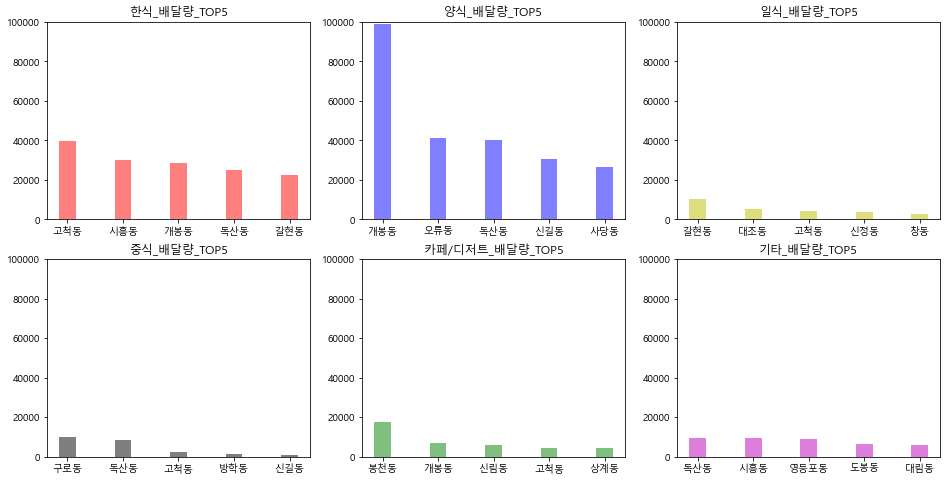

In [250]:

category_list=['한식','양식','일식','중식','카페/디저트','기타']
count_category_by_region=[]
count_category_by_region_df=pd.DataFrame()
for category in category_list:
    data=category_df[category_df['category']==category].sort_values(by='DLVR_REQUST_STTUS_VALUE',ascending=False).head(5)
    count_category_by_region_df = count_category_by_region_df.append(data)
    count_category_by_region.append(data)
count_category_by_region

colors=['r','b','y','k','g','m']
plt.figure(figsize=(16,8))
index=0
for i in category_list:
    plt.subplot(2,3,index+1)
    plt.bar(count_category_by_region[index]['DLVR_STORE_LEGALDONG_NM'],count_category_by_region[index]['DLVR_REQUST_STTUS_VALUE'],width=0.3,color=colors[index],alpha=0.5)
    plt.ylim(0,100000)
    plt.title('{}_배달량_TOP5'.format(i))
    index=index+1

plt.savefig('C:/myPyCode/figures/count_category_by_region.png')
plt.show()

count_category_by_region_df.to_csv('C:/myPyCode/figures/count_category_by_region_df.csv',encoding='cp949')


In [10]:
# 개봉동 양식
# 평균 1회 배달 결제 금액
gaebong_west=deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_STORE_LEGALDONG_NM']=='개봉동') & (deliv_data['category']=='양식')]
gaebong_west.head(4)

,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_AMOUNT,...,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month,category
34,2019-12-01,1,치킨,서울특별시,구로구,개봉동,서울특별시,구로구,구로동,4300,...,2,,2019-12-01 23:11:38,2019-12-01 23:13:18,2019-12-01 23:25:19,2019-12-01 23:33:09,\N,2019,12,양식
65,2019-12-01,1,치킨,서울특별시,구로구,개봉동,경기도,광명시,철산동,4300,...,2,,2019-12-01 21:11:37,2019-12-01 21:12:42,2019-12-01 21:30:08,2019-12-01 21:52:04,\N,2019,12,양식
78,2019-12-01,1,치킨,서울특별시,구로구,개봉동,서울특별시,구로구,개봉동,3300,...,1,승인:KB국민카드,2019-12-01 21:04:00,2019-12-01 21:04:15,2019-12-01 21:22:35,2019-12-01 21:25:45,\N,2019,12,양식
172,2019-12-01,1,치킨,서울특별시,구로구,개봉동,서울특별시,구로구,고척동,3300,...,3,,2019-12-01 19:17:33,2019-12-01 20:00:01,2019-12-01 20:02:31,2019-12-01 20:14:56,\N,2019,12,양식


In [10]:
# 평균 1회 배달 결제 금액
gaebong_amount_mean = round(gaebong_west['GOODS_AMOUNT'].mean())
gaebong_amount_mean

20407

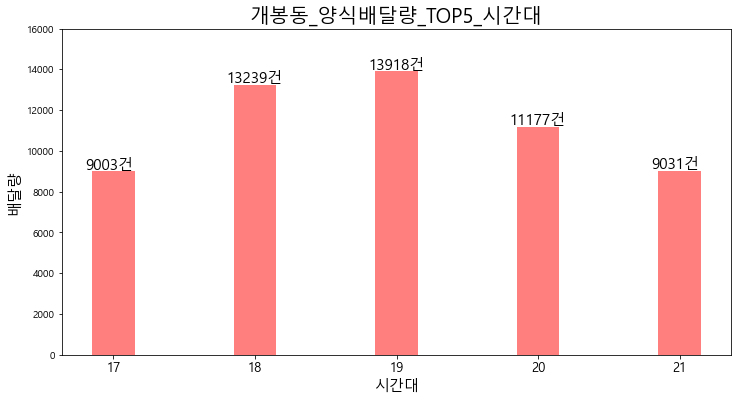

In [41]:
# 배달이 가장 잦은 시간대
freq_hour=gaebong_west['DLVR_RCEPT_TIME'].apply(lambda x : pd.to_datetime(x).hour)
freq_hour_top5 = pd.DataFrame(freq_hour).groupby('DLVR_RCEPT_TIME')['DLVR_RCEPT_TIME'].count().sort_values(ascending=False).head(5)
freq_hour_top5 = freq_hour_top5.reindex([17,18,19,20,21])
freq_hour_top5

sizes=15
plt.figure(figsize=(12,6))
plt.bar(range(5),freq_hour_top5.values,color='r',alpha=0.5,width=0.3)
plt.xlabel('시간대',size=sizes)
plt.xticks(range(5),[17,18,19,20,21],size=sizes-2)
plt.ylabel('배달량',size=sizes)
plt.ylim([0,16000])
plt.title('개봉동_양식배달량_TOP5_시간대',size=sizes+5)
for x,y in zip(range(5),freq_hour_top5.values):
    plt.text(x-0.2,y+100,'{}건'.format(y),size=sizes)


plt.savefig('C:/myPyCode/figures/freq_hour_top5.png')
plt.show()

freq_hour_top5.to_csv('C:/myPyCode/figures/freq_hout_top5_df.csv',encoding='cp949')


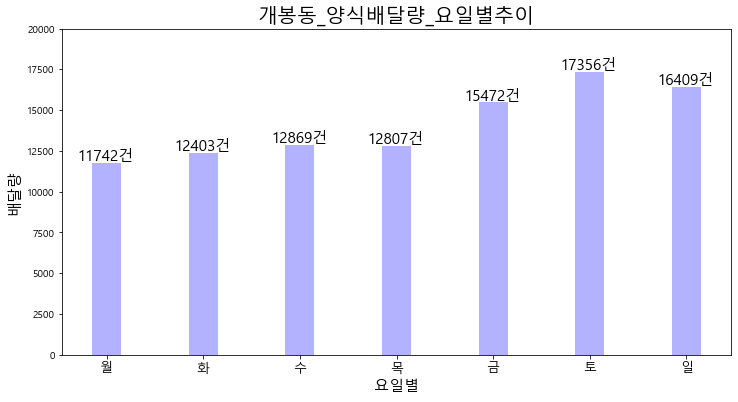

In [94]:
# 배달 매출이 높은 요일
gaebong_weekday=gaebong_west['PROCESS_DT']
gaebong_weekday = pd.DataFrame(gaebong_weekday.apply(lambda x : datetime.datetime.weekday(x)))
gaebong_weekday = gaebong_weekday.groupby('PROCESS_DT')['PROCESS_DT'].count()

sizes=15
plt.figure(figsize=(12,6))
plt.bar(range(7),gaebong_weekday.values,color='b',alpha=0.3,width=0.3)
plt.xlabel('요일별',size=sizes)
plt.xticks(range(7),['월','화','수','목','금','토','일'],size=sizes-2)
plt.ylabel('배달량',size=sizes)
plt.ylim([0,20000])
plt.title('개봉동_양식배달량_요일별추이',size=sizes+5)
for x,y in zip(range(7),gaebong_weekday.values):
    plt.text(x-0.3,y+150,'{}건'.format(y),size=sizes)

plt.savefig('C:/myPyCode/figures/gaebong_weekday.png')
plt.show()

pd.DataFrame(gaebong_weekday).to_csv('C:/myPyCode/figures/gaebong_weekday_df.csv',encoding='cp949')

In [178]:
# 평균 배달 소요 시간

gaebong_time = gaebong_west[['DLVR_RCEPT_TIME','DLVR_RECPT_TIME']]
gaebong_time=gaebong_time.loc[gaebong_time['DLVR_RECPT_TIME'].str[:4].isin(['2019','2020'])]
gaebong_time['DLVR_RCEPT_TIME'] = pd.to_datetime(gaebong_time['DLVR_RCEPT_TIME'])
gaebong_time['DLVR_RECPT_TIME'] = pd.to_datetime(gaebong_time['DLVR_RECPT_TIME'])
gaebong_time['time_diff']=gaebong_time['DLVR_RECPT_TIME']-gaebong_time['DLVR_RCEPT_TIME']
gaebong_time['time_diff']=gaebong_time['DLVR_RECPT_TIME']-gaebong_time['DLVR_RCEPT_TIME']
time_diff = gaebong_time.describe()

time_diff.to_csv('C:/myPyCode/figures/time_diff.csv',encoding='cp949')


In [21]:
# [분석 요청 사장님 1] 지역구별 배달 업종별 평균 배달 매출 추이

category_df = deliv_data[(deliv_data['DLVR_REQUST_STTUS_VALUE']==1) & (deliv_data['DLVR_STORE_BRTC_NM']=='서울특별시')]

west=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='개봉동') & (category_df['category']=='양식')]
korea=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='고척동') & (category_df['category']=='한식')]
japan=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='갈현동') & (category_df['category']=='일식')]
china=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='구로동') & (category_df['category']=='중식')]
desert=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='봉천동') & (category_df['category']=='카페/디저트')]
etc=category_df[(category_df['DLVR_STORE_LEGALDONG_NM']=='독산동') & (category_df['category']=='기타')]


,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,...,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month,category
197,3487247,2019-12-01,1,카페/디저트,서울특별시,관악구,봉천동,서울특별시,관악구,신림동,...,2,,2019-12-01 19:22:04,2019-12-01 19:38:00,2019-12-01 20:01:27,2019-12-01 20:25:44,\N,2019,12,카페/디저트
208,3487266,2019-12-01,1,카페/디저트,서울특별시,관악구,봉천동,서울특별시,관악구,봉천동,...,2,,2019-12-01 18:35:37,2019-12-01 19:13:48,2019-12-01 20:04:24,2019-12-01 20:09:05,\N,2019,12,카페/디저트
366,3487522,2019-12-01,1,카페/디저트,서울특별시,관악구,봉천동,서울특별시,관악구,봉천동,...,2,,2019-12-01 20:38:49,2019-12-01 20:49:27,2019-12-01 21:11:33,2019-12-01 21:21:58,\N,2019,12,카페/디저트
488,3487716,2019-12-01,1,카페/디저트,서울특별시,관악구,봉천동,서울특별시,관악구,봉천동,...,2,,2019-12-01 18:41:40,2019-12-01 19:14:17,2019-12-01 19:35:35,2019-12-01 19:58:19,\N,2019,12,카페/디저트


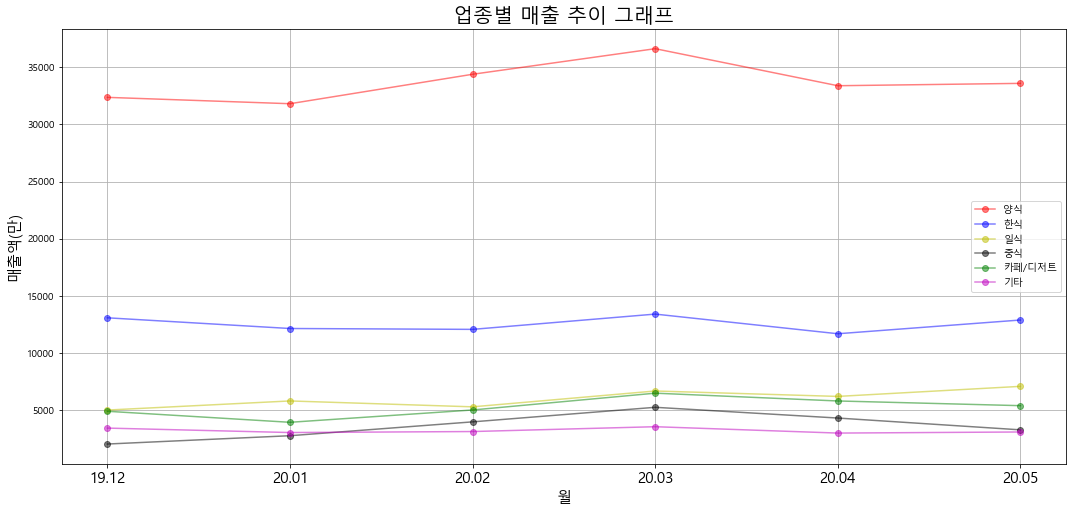

In [34]:
object_list=[]
df=pd.DataFrame()
objects=[west,korea,japan,china,desert,etc]
for obj in objects:
    data=obj.groupby('month')['GOODS_AMOUNT'].sum().reindex([12,1,2,3,4,5])
    object_list.append(data)
    df = df.append(data)

sizes=15
index=['양식','한식','일식','중식','카페/디저트','기타']
colors=['r','b','y','k','g','m']
plt.figure(figsize=(18,8))
plt.plot(range(6),object_list[0].values/10000,'-ro',label='양식',alpha=0.5)
plt.plot(range(6),object_list[1].values/10000,'-bo',label='한식',alpha=0.5)
plt.plot(range(6),object_list[2].values/10000,'-yo',label='일식',alpha=0.5)
plt.plot(range(6),object_list[3].values/10000,'-ko',label='중식',alpha=0.5)
plt.plot(range(6),object_list[4].values/10000,'-go',label='카페/디저트',alpha=0.5)
plt.plot(range(6),object_list[5].values/10000,'-mo',label='기타',alpha=0.5)
plt.grid(True)
plt.ylabel('매출액(만)',size=sizes)
plt.xlabel('월',size=15)
plt.xticks(range(6),['19.12','20.01','20.02','20.03','20.04','20.05'],size=15)
plt.title('업종별 매출 추이 그래프',size=20)
plt.legend(index)

plt.savefig('C:/myPyCode/figures/amount_by_month_and_category.png')
plt.show()

df.index=['(개봉동,양식)','(고척동,한식)','(갈현동,일식)','(구로동,중식)','(봉천동,카페/디저트)','(독산동,기타)']
df=df[[12,1,2,3,4,5]]
df.to_csv("C:/myPyCode/figures/amount_by_month_and_category_df.csv")

In [427]:
# 새로운 시작 뉴 에피소드 닷닷 대시 닷닷 

deliv_data = pd.read_csv('data/dlvr_call.csv')

deliv_data['PROCESS_DT']=pd.to_datetime(deliv_data['PROCESS_DT'])
deliv_data['year'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).year
deliv_data['month'] = pd.to_datetime(deliv_data['PROCESS_DT'].values).month
deliv_data['SETLE_CARD_NM'].fillna('',inplace=True)

deliv_data.drop(['DLVR_REQUST_ENTRPS_ID','DLVR_RCEPT_ENTRPS_ID','DLVR_STORE_ID'],axis=1,inplace=True)
deliv_data.drop(['DLVR_STORE_LEGALDONG_CODE','DLVR_STORE_LI_NM','DLVR_STORE_ADSTRD_CODE','DLVR_STORE_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_DSTN_LEGALDONG_CODE','DLVR_DSTN_LI_NM','DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE'],axis=1,inplace=True)
deliv_data.drop(['DLVR_MAN_ID'],axis=1,inplace=True)
deliv_data = deliv_data[deliv_data['DLVR_REQUST_STTUS_VALUE']==1]

deliv_data.head(4)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SN,PROCESS_DT,DLVR_REQUST_STTUS_VALUE,DLVR_STORE_INDUTY_NM,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,...,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,year,month
0,3486929,2019-12-01,1,족발/보쌈,서울특별시,영등포구,신길동,서울특별시,동작구,대방동,...,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N,2019,12
1,3486930,2019-12-01,1,치킨,경기도,고양시 일산동구,중산동,경기도,고양시 일산동구,중산동,...,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N,2019,12
2,3486932,2019-12-01,1,치킨,경기도,의정부시,의정부동,경기도,의정부시,녹양동,...,19500,2,,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N,2019,12
3,3486933,2019-12-01,1,돈까스/일식,경기도,고양시 일산동구,장항동,경기도,고양시 일산동구,마두동,...,18000,2,,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N,2019,12


In [428]:
time = pd.read_csv('data/TimeProvince.csv')
time=time[time['province']=='Seoul']
time['date'] = pd.to_datetime(time['date'])
init = time.loc[0,'date']
end = deliv_data['PROCESS_DT'].max()
weeks=pd.date_range(init,end,freq='7d')
weeks=weeks.date
time=time.loc[time['date']<=end]
time

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
17,2020-01-21,16,Seoul,0,0,0
34,2020-01-22,16,Seoul,0,0,0
51,2020-01-23,16,Seoul,0,0,0
68,2020-01-24,16,Seoul,0,0,0
...,...,...,...,...,...,...
2176,2020-05-27,0,Seoul,802,618,4
2193,2020-05-28,0,Seoul,826,621,4
2210,2020-05-29,0,Seoul,846,623,4
2227,2020-05-30,0,Seoul,855,627,4


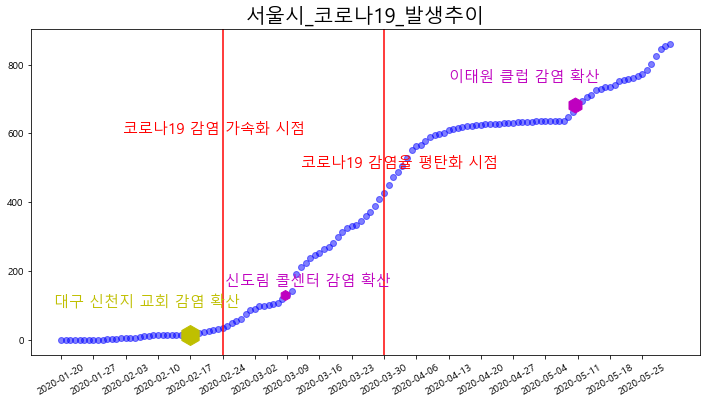

In [429]:
plt.figure(figsize=(12,6))
plt.plot(range(133),time['confirmed'],'bo',alpha=0.5,linewidth=3)
plt.xticks(7*np.arange(19),weeks,rotation=30)
plt.title('서울시_코로나19_발생추이',size=20)
plt.axvline(7*5, c='r') 
plt.axvline(7*10, c='r') 
plt.plot(7*4,time['confirmed'].iloc[7*4],'yh',markersize=20)
plt.plot(7*7-0.5,time['confirmed'].iloc[7*7],'mh',markersize=10)
plt.plot(7*16-0.5,time['confirmed'].iloc[7*16],'mh',markersize=15)
plt.text(-1.5,100,'대구 신천지 교회 감염 확산',size=15,color='y',alpha=2)
plt.text(7*5+0.5,160,'신도림 콜센터 감염 확산',size=15,color='m',alpha=2)
plt.text(7*12,750,'이태원 클럽 감염 확산',size=15,color='m',alpha=2)
plt.text(7*2-0.5,600,'코로나19 감염 가속화 시점',size=15,color='r')
plt.text(7*7+3,500,'코로나19 감염율 평탄화 시점',size=15,color='r')

plt.savefig("C:/myPyCode/figures/서울시_코로나19_발생추이.png")
plt.show()
